# Delaunay-Watershed for data compression : Nuclei data

In this notebook, we present how to compress label data in polygonal lines and recompute the mask from the polygonal lines and the seeds if necessary

## 1) Download nuclei data from DSB2018

In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file

#download_and_extract_zip_file(
#    url       = 'https://github.com/stardist/stardist/releases/download/0.1.0/dsb2018.zip',
#    targetdir = 'data',
#    verbose   = 1,)
X = sorted(glob('data/dsb2018/train/images/*.tif'))
Y = sorted(glob('data/dsb2018/train/masks/*.tif'))

## 2) Compute polygonal lines with Delaunay Watershed

Number of Nodes : 704  Number of Edges : 900


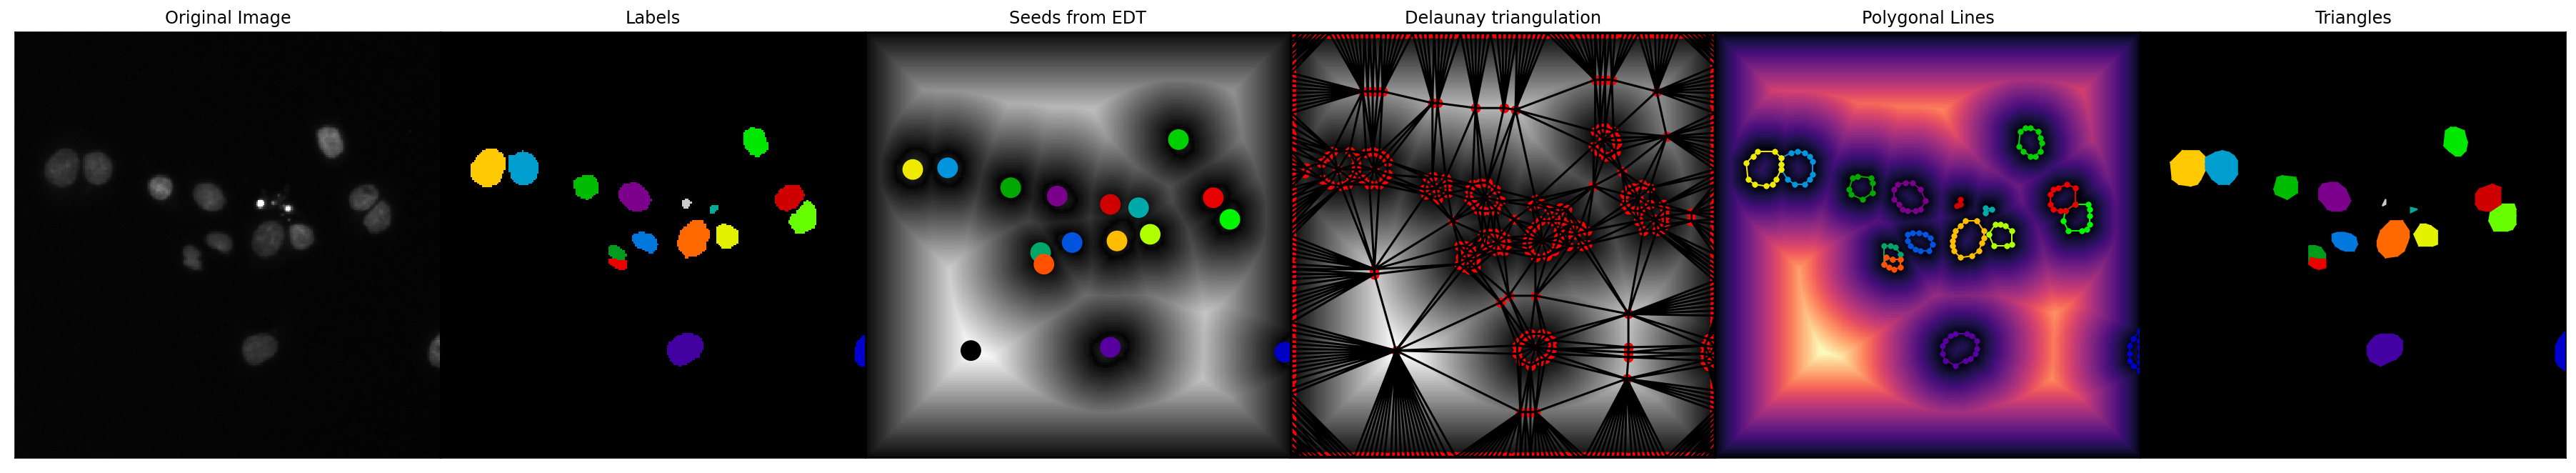

In [2]:
from delaunay_watershed_2d import geometry_reconstruction_2d

img = imread(X[2])
lbl = imread(Y[2])

DW = geometry_reconstruction_2d(lbl,expansion_labels=0, min_dist=3,original_image=img)
DW.extended_plot()
plt.savefig("../Figures_readme/DW_2d_nuclei.png")

## 3) Export segmentations for reconstruction

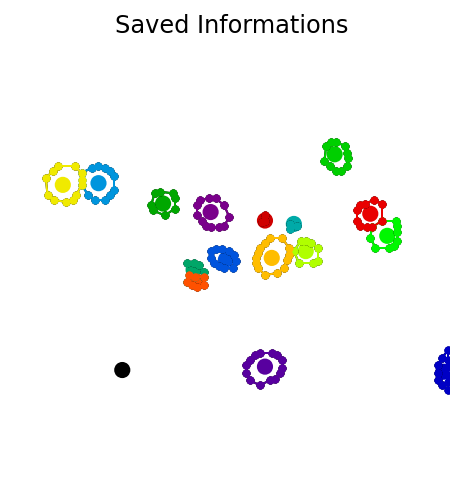

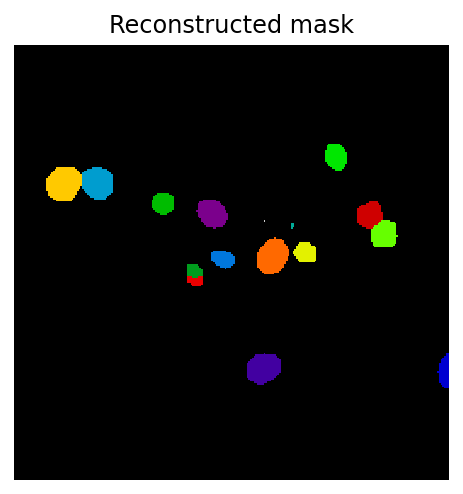

In [3]:
from delaunay_watershed_2d import reconstruct_mask_from_dict
import matplotlib.pyplot as plt
DW.plot_polylines_and_seeds()
DW.export_segmentation("Dict_mask.npy")
labels = reconstruct_mask_from_dict("Dict_mask.npy",plot = True)


## 4) Print size saved : 

In [5]:
import sys
import numpy as np 
D = np.load("Dict_mask.npy",allow_pickle=True).item()
Dict_memory_footprint = D['Verts'].nbytes + D['Edges'].nbytes + D['seeds'].nbytes + D['image_shape'].nbytes
print("Size of Delaunay-Watershed data:",Dict_memory_footprint,"bytes")
print("Size of the labels:",labels.nbytes,"bytes")
print("Relative size:", Dict_memory_footprint/labels.nbytes)

Size of Delaunay-Watershed data: 13232 bytes
Size of the labels: 262144 bytes
Relative size: 0.05047607421875
